## init

In [1]:
from pyfiles import examples as ex, input as inp, plot as ourplot
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

## closest point voronoi

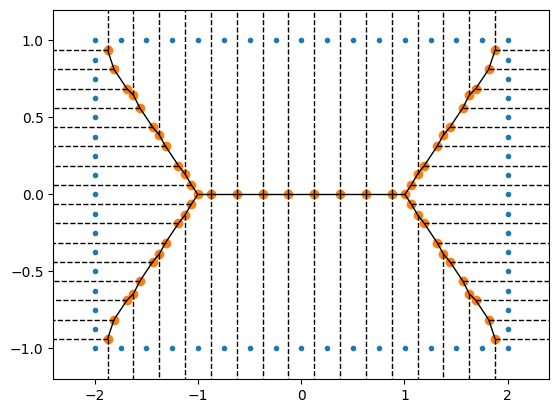

In [27]:
example = ex.two_d_rect
complex = inp.read_obj(example.filename)
coords = np.array([s.coords for s in complex.vertlist])

# just the 2d coords for now
smallcoords = coords[:, 0:2]

vor = Voronoi(smallcoords, furthest_site=False)
fig = voronoi_plot_2d(vor)
plt.show()

## furthest point voronoi

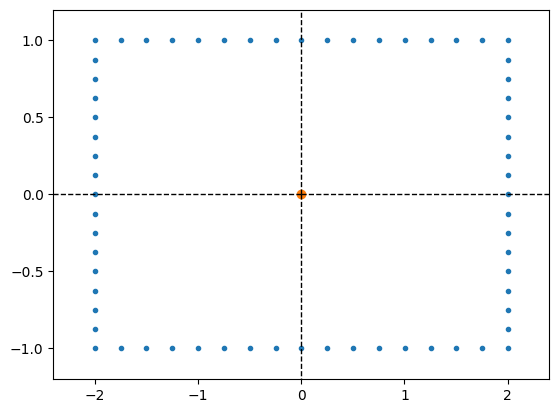

In [28]:
vor = Voronoi(smallcoords, furthest_site=True)
fig = voronoi_plot_2d(vor)
plt.show()

## 3D voronoi

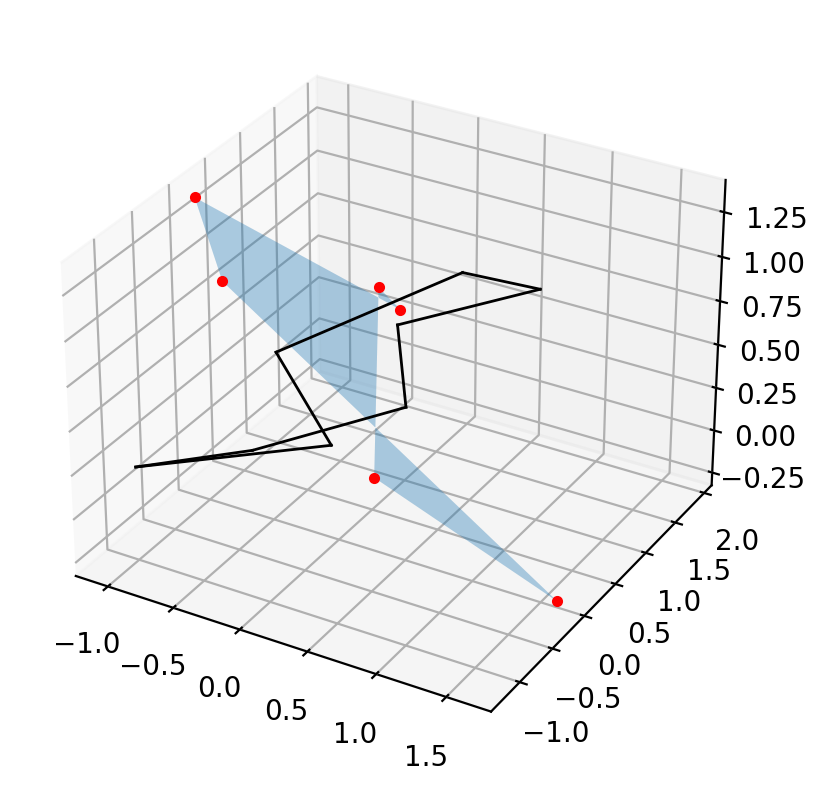

In [3]:
example = ex.weirdshape
complex = inp.read_obj(example.filename)
coords = np.array([s.coords for s in complex.vertlist])

vor = Voronoi(coords, furthest_site=False)

fig, ax = plt.subplots(subplot_kw={"projection": "3d", "computed_zorder": False})
fig.set_dpi(200)

for edge in complex.edgelist:
    p = complex.vertlist[edge.boundary[0]].coords
    q = complex.vertlist[edge.boundary[1]].coords
    ax.plot([p[0], q[0]], [p[1], q[1]], [p[2], q[2]], color="black", linewidth=1)

for row in vor.vertices:
    ax.plot(row[0], row[1], row[2], "o", color="red", markersize=3)


from mpl_toolkits.mplot3d.art3d import Poly3DCollection
regions = vor.regions
for reg in regions:
    if reg == []:
        continue
    asd = vor.vertices[reg if reg[0] != -1 else reg[1:]]
    xs = asd[:, 0]
    ys = asd[:, 1]
    zs = asd[:, 2]
    verts = [list(zip(xs, ys, zs))]
    ax.add_collection3d(Poly3DCollection(verts, alpha = 0.2)) # type: ignore
